<a href="https://colab.research.google.com/github/Harshi-Ponnu/Bio-Inspired-Optimization-for-Enhanced-Feature-Selection-in-Autism-Spectrum-Disorder-Classification/blob/main/Firefly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#from pyswarm import pso
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Toddler Autism dataset July 2018.csv')
data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [ ]:
data.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [ ]:
data.isnull().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [ ]:
data.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [ ]:
data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


**Encode categorical variables**

In [ ]:
label_encoders = {}
categorical_columns = ['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test','Class/ASD Traits ']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [ ]:
X = data.drop(['Case_No', 'Class/ASD Traits '], axis=1)
y = data['Class/ASD Traits ']

**Feature scaling using StandardScaler**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=15)  # Adjust n_components based on the dataset
X_reduced = pca.fit_transform(X_scaled)

In [ ]:
pca

PCA(n_components=15)

# 1) MLP Classifier

**Define Fire Fly Optimization objective function for feature selection**

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Train Accuracy: 1.0
Test Accuracy: 1.0
Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 52, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Final accuracy with selected features: 0.9620853080568721

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00       588

    accuracy     

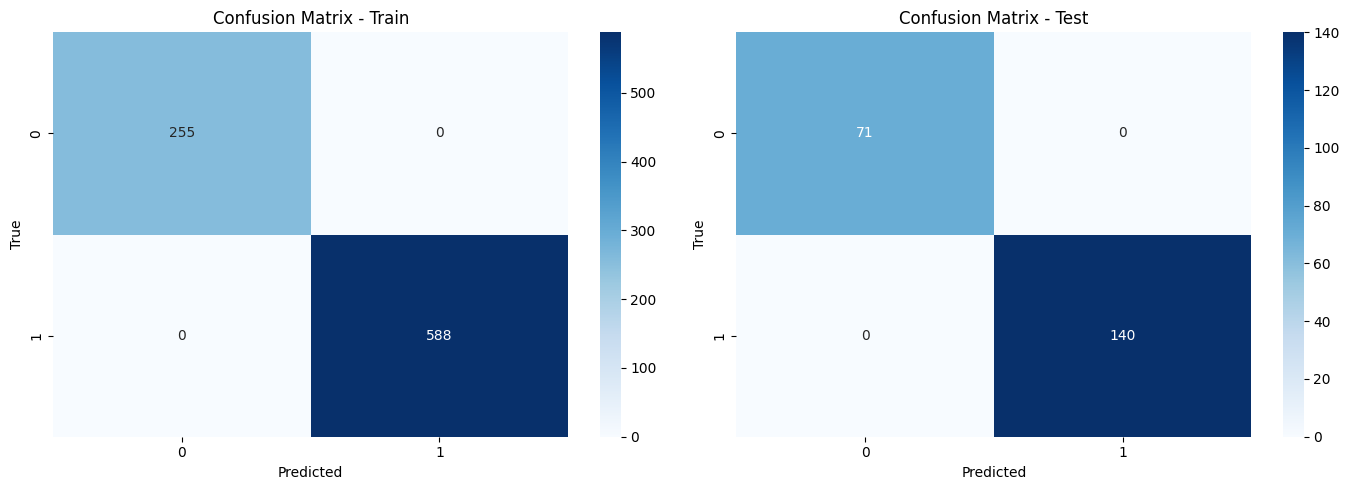

In [ ]:

def objective_function(features, X, y):
    features = np.array(features).astype(bool)
    if not np.any(features):  # Ensure at least one feature is selected
        return float('inf')  # Return a high value for invalid solutions
    X_selected = X[:, features]

    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    clf = MLPClassifier(max_iter=1000, random_state=52)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return -accuracy_score(y_test, y_pred)

# Firefly Algorithm
class FireflyAlgorithm:
    def __init__(self, objective_function, lb, ub, args=(), pop_size=20, max_iter=50, alpha=0.5, beta_min=0.2, gamma=1.0):
        self.objective_function = objective_function
        self.lb = np.array(lb)
        self.ub = np.array(ub)
        self.args = args
        self.pop_size = pop_size
        self.max_iter = max_iter
        self.alpha = alpha
        self.beta_min = beta_min
        self.gamma = gamma

    def run(self):
        dim = len(self.lb)
        population = np.random.randint(2, size=(self.pop_size, dim))
        fitness = np.apply_along_axis(self.objective_function, 1, population, *self.args)

        best_firefly = population[np.argmin(fitness)]
        best_fitness = np.min(fitness)

        for t in range(self.max_iter):
            for i in range(self.pop_size):
                for j in range(self.pop_size):
                    if fitness[i] > fitness[j]:
                        r = np.linalg.norm(population[i] - population[j])
                        beta = self.beta_min + (1 - self.beta_min) * np.exp(-self.gamma * r ** 2)
                        population[i] = population[i] + beta * (population[j] - population[i]) + \
                                        self.alpha * (np.random.rand(dim) - 0.5)
                        population[i] = np.clip(population[i], self.lb, self.ub)
                        population[i] = np.round(population[i])
                        if not np.any(population[i]):  # Ensure at least one feature is selected
                            population[i][np.random.randint(dim)] = 1
                        fitness[i] = self.objective_function(population[i], *self.args)

            best_firefly = population[np.argmin(fitness)]
            best_fitness = np.min(fitness)

        return best_firefly, best_fitness
num_features = X_reduced.shape[1]
lb = [0] * num_features
ub = [1] * num_features

fa = FireflyAlgorithm(objective_function, lb, ub, args=(X_reduced, y), pop_size=10, max_iter=25)
best_features, _ = fa.run()
# Select best features
X_selected = X_reduced[:, best_features.astype(bool)]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=52)
# Define parameter grid for ANN
param_grid = {
    'hidden_layer_sizes': [(50,), (30, 30)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.01, 0.1],  # Increase alpha for stronger regularization
    'learning_rate': ['constant', 'adaptive']
}
grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=52), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
# Best parameters
best_params = grid_search.best_params_

# Train the model with best parameters
best_clf = MLPClassifier(max_iter=1000, random_state=52, **best_params)
best_clf.fit(X_train, y_train)
# Predictions
y_pred_train = best_clf.predict(X_train)
y_pred_test = best_clf.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Best Parameters:", best_clf.get_params())
print("Best Parameters:", best_params)
clf = MLPClassifier(max_iter=1000, random_state=42, early_stopping=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Final accuracy with selected features:", accuracy)
print("\nClassification Report (Train):")
print(classification_report(y_train, y_pred_train))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

In [ ]:
num_features = X_reduced.shape[1]
lb = [0] * num_features
ub = [1] * num_features

fa = FireflyAlgorithm(objective_function, lb, ub, args=(X_reduced, y), pop_size=10, max_iter=25)
best_features, _ = fa.run()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Select best features
X_selected = X_reduced[:, best_features.astype(bool)]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=52)

**Define parameter grid for ANN**

In [ ]:
# Define parameter grid for ANN
param_grid = {
    'hidden_layer_sizes': [(50,), (30, 30)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.01, 0.1],  # Increase alpha for stronger regularization
    'learning_rate': ['constant', 'adaptive']
}

**Grid search based optimization**

In [ ]:
grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=52), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=52),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'], 'alpha': [0.01, 0.1],
                         'hidden_layer_sizes': [(50,), (30, 30)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']},
             verbose=2)

In [ ]:
# Best parameters
best_params = grid_search.best_params_

# Train the model with best parameters
best_clf = MLPClassifier(max_iter=1000, random_state=52, **best_params)
best_clf.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(50,),
              max_iter=1000, random_state=52)

In [ ]:
# Predictions
y_pred_train = best_clf.predict(X_train)
y_pred_test = best_clf.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Best Parameters:", best_clf.get_params())
print("Best Parameters:", best_params)

Train Accuracy: 1.0
Test Accuracy: 1.0
Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 52, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
clf = MLPClassifier(max_iter=1000, random_state=42, early_stopping=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Final accuracy with selected features:", accuracy)

Final accuracy with selected features: 0.95260663507109


**Classification Report**


Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00       588

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted avg       1.00      1.00      1.00       843


Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00       140

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



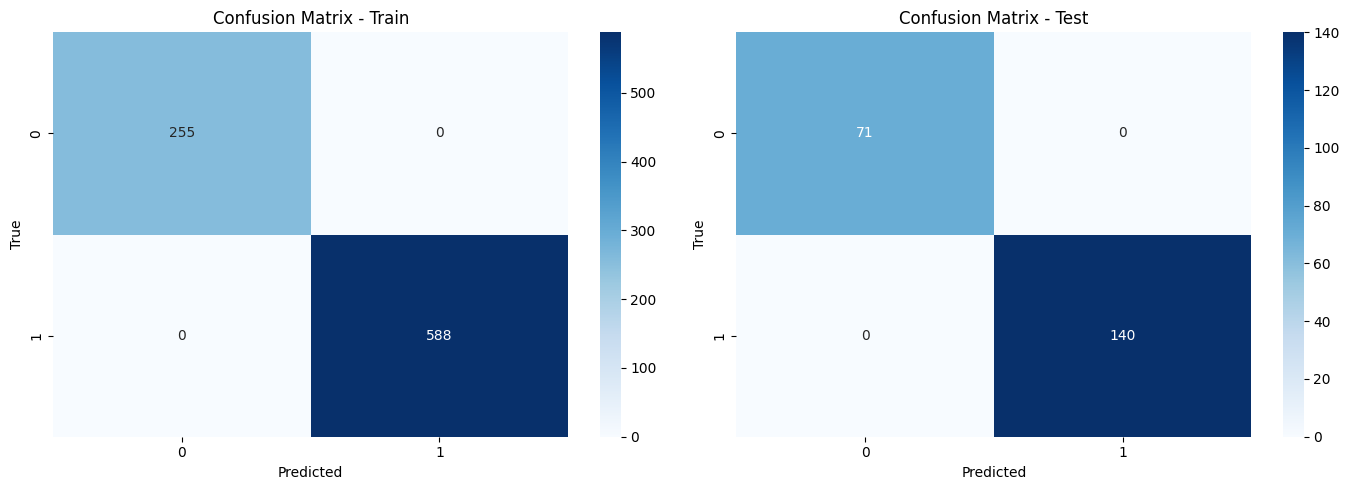

In [ ]:
print("\nClassification Report (Train):")
print(classification_report(y_train, y_pred_train))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

# 2) Random Forest

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Train Accuracy: 1.0
Test Accuracy: 0.985781990521327
Best Parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 52, 'verbose': 0, 'warm_start': False}
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Final accuracy with selected features: 0.985781990521327

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00       588

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00 

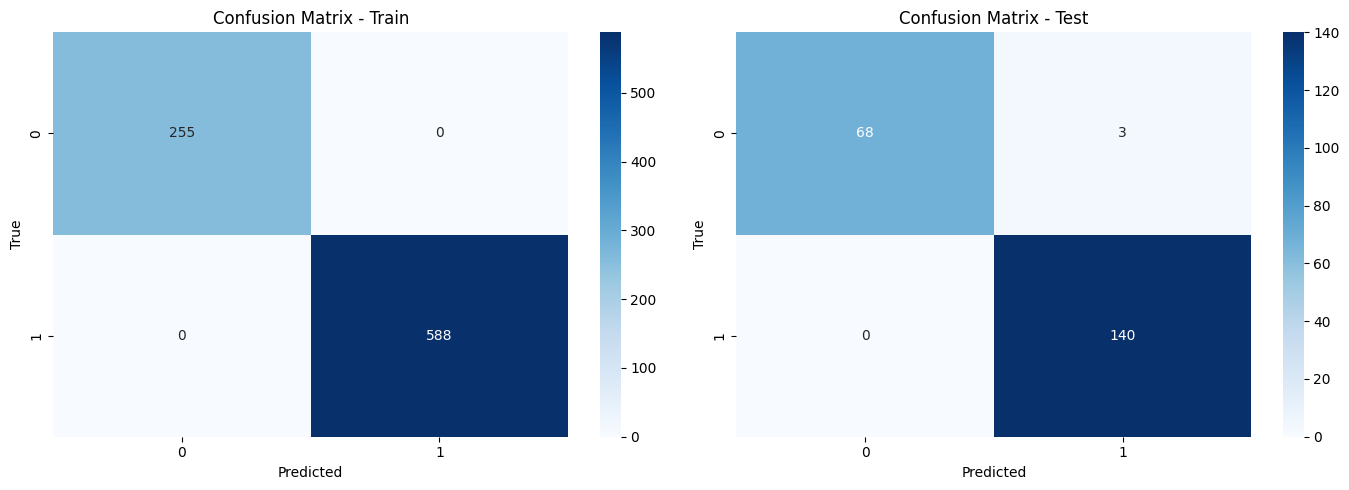

In [ ]:
def objective_function(features, X, y):
    features = np.array(features).astype(bool)
    if not np.any(features):  # Ensure at least one feature is selected
        return float('inf')  # Return a high value for invalid solutions
    X_selected = X[:, features]

    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(random_state=52)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return -accuracy_score(y_test, y_pred)

# Firefly Algorithm
class FireflyAlgorithm:
    def __init__(self, objective_function, lb, ub, args=(), pop_size=20, max_iter=50, alpha=0.5, beta_min=0.2, gamma=1.0):
        self.objective_function = objective_function
        self.lb = np.array(lb)
        self.ub = np.array(ub)
        self.args = args
        self.pop_size = pop_size
        self.max_iter = max_iter
        self.alpha = alpha
        self.beta_min = beta_min
        self.gamma = gamma

    def run(self):
        dim = len(self.lb)
        population = np.random.randint(2, size=(self.pop_size, dim))
        fitness = np.apply_along_axis(self.objective_function, 1, population, *self.args)

        best_firefly = population[np.argmin(fitness)]
        best_fitness = np.min(fitness)

        for t in range(self.max_iter):
            for i in range(self.pop_size):
                for j in range(self.pop_size):
                    if fitness[i] > fitness[j]:
                        r = np.linalg.norm(population[i] - population[j])
                        beta = self.beta_min + (1 - self.beta_min) * np.exp(-self.gamma * r ** 2)
                        population[i] = population[i] + beta * (population[j] - population[i]) + \
                                        self.alpha * (np.random.rand(dim) - 0.5)
                        population[i] = np.clip(population[i], self.lb, self.ub)
                        population[i] = np.round(population[i])
                        if not np.any(population[i]):  # Ensure at least one feature is selected
                            population[i][np.random.randint(dim)] = 1
                        fitness[i] = self.objective_function(population[i], *self.args)

            best_firefly = population[np.argmin(fitness)]
            best_fitness = np.min(fitness)

        return best_firefly, best_fitness
# Define the objective function and apply FA
num_features = X_reduced.shape[1]
lb = [0] * num_features
ub = [1] * num_features

fa = FireflyAlgorithm(objective_function, lb, ub, args=(X_reduced, y), pop_size=10, max_iter=25)
best_features, _ = fa.run()
# Select best features
X_selected = X_reduced[:, best_features.astype(bool)]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=52)
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=52), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
# Best parameters
best_params = grid_search.best_params_
# Train the model with best parameters
best_clf = RandomForestClassifier(random_state=52, **best_params)
best_clf.fit(X_train, y_train)
# Predictions
y_pred_train = best_clf.predict(X_train)
y_pred_test = best_clf.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Best Parameters:", best_clf.get_params())
print("Best Parameters:", best_params)
# Final accuracy with selected features
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Final accuracy with selected features:", accuracy)
print("\nClassification Report (Train):")
print(classification_report(y_train, y_pred_train))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

In [ ]:
# Define the objective function and apply FA
num_features = X_reduced.shape[1]
lb = [0] * num_features
ub = [1] * num_features

fa = FireflyAlgorithm(objective_function, lb, ub, args=(X_reduced, y), pop_size=10, max_iter=25)
best_features, _ = fa.run()

In [ ]:
# Select best features
X_selected = X_reduced[:, best_features.astype(bool)]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=52)


**Define parameter grid for Random Forest**


In [ ]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

**Grid search based optimization**

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=52), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=52), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [ ]:
# Best parameters
best_params = grid_search.best_params_

In [ ]:
# Train the model with best parameters
best_clf = RandomForestClassifier(random_state=52, **best_params)
best_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=52)

In [ ]:
# Predictions
y_pred_train = best_clf.predict(X_train)
y_pred_test = best_clf.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Best Parameters:", best_clf.get_params())
print("Best Parameters:", best_params)

Train Accuracy: 1.0
Test Accuracy: 0.985781990521327
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 52, 'verbose': 0, 'warm_start': False}
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Final accuracy with selected features
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Final accuracy with selected features:", accuracy)

Final accuracy with selected features: 0.985781990521327


**Classification Report**


Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00       588

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted avg       1.00      1.00      1.00       843


Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        71
           1       0.98      1.00      0.99       140

    accuracy                           0.99       211
   macro avg       0.99      0.98      0.98       211
weighted avg       0.99      0.99      0.99       211



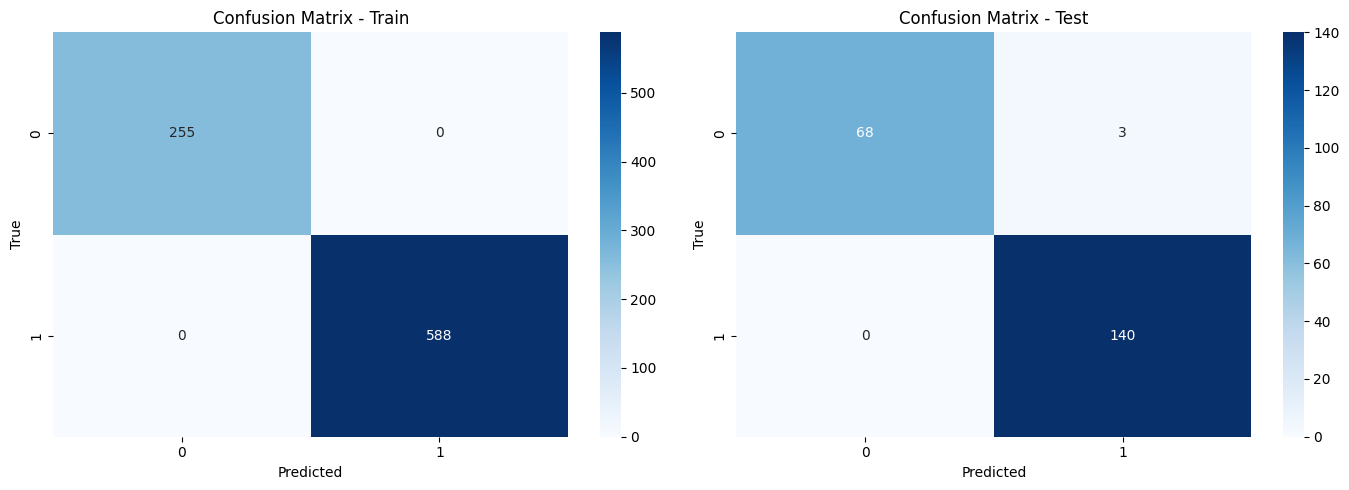

In [ ]:
print("\nClassification Report (Train):")
print(classification_report(y_train, y_pred_train))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

# 3) KNN

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Train Accuracy: 0.9857651245551602
Test Accuracy: 0.981042654028436
Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Final accuracy with selected features: 0.981042654028436

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       255
           1       0.99      0.99      0.99       588

    accuracy                           0.99       843
   macro avg       0.99      0.98      0.98       843
weighted avg       0.99      0.99      0.99       843


Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        71
           1       0.97      1.00      0.99       140

    accuracy  

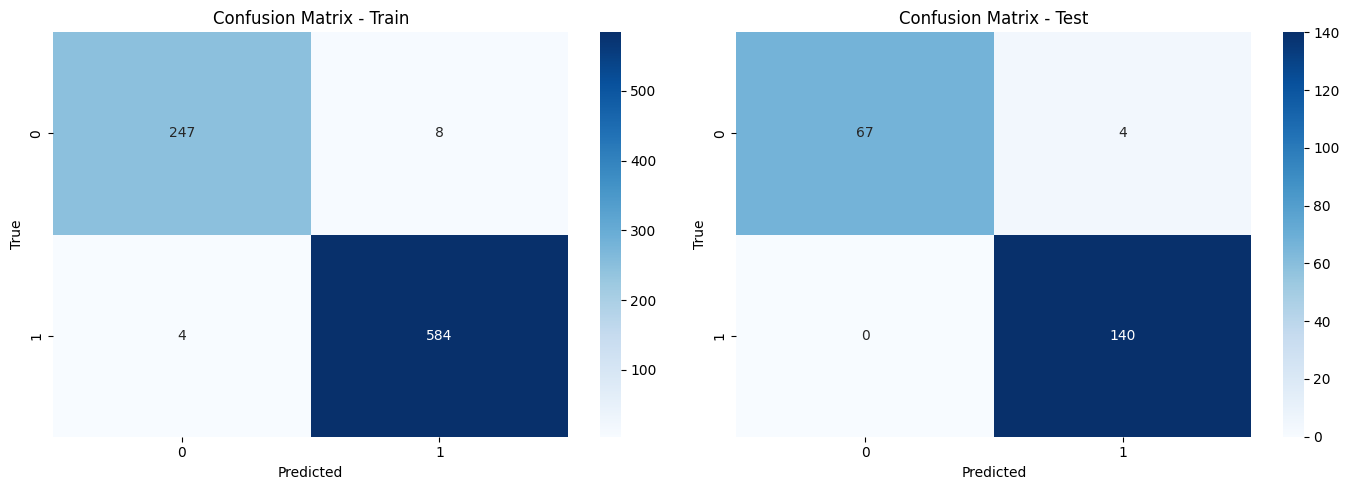

In [ ]:
def objective_function(features, X, y):
    features = np.array(features).astype(bool)
    if not np.any(features):  # Ensure at least one feature is selected
        return float('inf')  # Return a high value for invalid solutions
    X_selected = X[:, features]

    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return -accuracy_score(y_test, y_pred)

# Firefly Algorithm
class FireflyAlgorithm:
    def __init__(self, objective_function, lb, ub, args=(), pop_size=20, max_iter=50, alpha=0.5, beta_min=0.2, gamma=1.0):
        self.objective_function = objective_function
        self.lb = np.array(lb)
        self.ub = np.array(ub)
        self.args = args
        self.pop_size = pop_size
        self.max_iter = max_iter
        self.alpha = alpha
        self.beta_min = beta_min
        self.gamma = gamma

    def run(self):
        dim = len(self.lb)
        population = np.random.randint(2, size=(self.pop_size, dim))
        fitness = np.apply_along_axis(self.objective_function, 1, population, *self.args)

        best_firefly = population[np.argmin(fitness)]
        best_fitness = np.min(fitness)

        for t in range(self.max_iter):
            for i in range(self.pop_size):
                for j in range(self.pop_size):
                    if fitness[i] > fitness[j]:
                        r = np.linalg.norm(population[i] - population[j])
                        beta = self.beta_min + (1 - self.beta_min) * np.exp(-self.gamma * r ** 2)
                        population[i] = population[i] + beta * (population[j] - population[i]) + \
                                        self.alpha * (np.random.rand(dim) - 0.5)
                        population[i] = np.clip(population[i], self.lb, self.ub)
                        population[i] = np.round(population[i])
                        if not np.any(population[i]):  # Ensure at least one feature is selected
                            population[i][np.random.randint(dim)] = 1
                        fitness[i] = self.objective_function(population[i], *self.args)

            best_firefly = population[np.argmin(fitness)]
            best_fitness = np.min(fitness)

        return best_firefly, best_fitness
# Define the objective function and apply FA
num_features = X_reduced.shape[1]
lb = [0] * num_features
ub = [1] * num_features

fa = FireflyAlgorithm(objective_function, lb, ub, args=(X_reduced, y), pop_size=10, max_iter=25)
best_features, _ = fa.run()
# Select best features
X_selected = X_reduced[:, best_features.astype(bool)]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=52)
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
# Best parameters
best_params = grid_search.best_params_
# Train the model with best parameters
best_clf = KNeighborsClassifier(**best_params)
best_clf.fit(X_train, y_train)
# Predictions
y_pred_train = best_clf.predict(X_train)
y_pred_test = best_clf.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Best Parameters:", best_clf.get_params())
print("Best Parameters:", best_params)
clf = KNeighborsClassifier(**best_params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Final accuracy with selected features:", accuracy)
print("\nClassification Report (Train):")
print(classification_report(y_train, y_pred_train))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

In [ ]:
# Define the objective function and apply FA
num_features = X_reduced.shape[1]
lb = [0] * num_features
ub = [1] * num_features

fa = FireflyAlgorithm(objective_function, lb, ub, args=(X_reduced, y), pop_size=10, max_iter=25)
best_features, _ = fa.run()

In [ ]:
# Select best features
X_selected = X_reduced[:, best_features.astype(bool)]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=52)

**Define parameter grid for KNN**

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

**Grid search based optimization**

In [ ]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
# Best parameters
best_params = grid_search.best_params_
# Train the model with best parameters
best_clf = KNeighborsClassifier(**best_params)
best_clf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


KNeighborsClassifier(n_neighbors=7, weights='distance')

In [ ]:
# Predictions
y_pred_train = best_clf.predict(X_train)
y_pred_test = best_clf.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Best Parameters:", best_clf.get_params())
print("Best Parameters:", best_params)

Train Accuracy: 1.0
Test Accuracy: 0.976303317535545
Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}


In [ ]:
clf = KNeighborsClassifier(**best_params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Final accuracy with selected features:", accuracy)

Final accuracy with selected features: 0.976303317535545


**Classification Report**


Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00       588

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted avg       1.00      1.00      1.00       843


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.98      0.99      0.98       140

    accuracy                           0.98       211
   macro avg       0.98      0.97      0.97       211
weighted avg       0.98      0.98      0.98       211



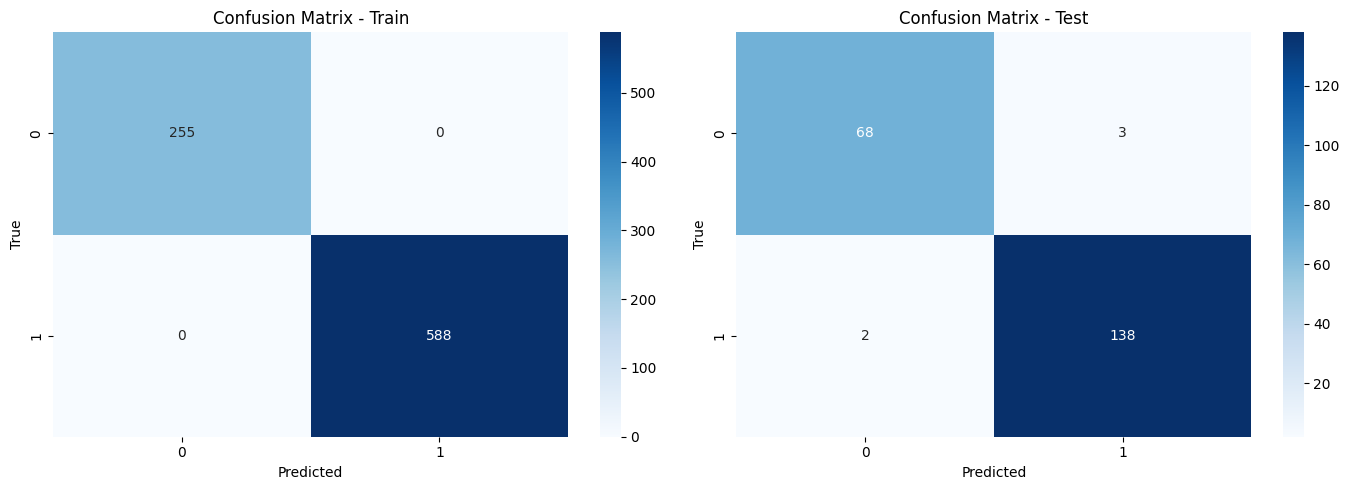

In [ ]:
print("\nClassification Report (Train):")
print(classification_report(y_train, y_pred_train))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

# 4) GaussianNB

**Note: Naive Bayes doesn't have hyperparameters for Grid Search like Other Classifiers.**

Train Accuracy: 0.9869513641755635
Test Accuracy: 0.981042654028436

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       255
           1       0.98      1.00      0.99       588

    accuracy                           0.99       843
   macro avg       0.99      0.98      0.98       843
weighted avg       0.99      0.99      0.99       843


Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        71
           1       0.97      1.00      0.99       140

    accuracy                           0.98       211
   macro avg       0.99      0.97      0.98       211
weighted avg       0.98      0.98      0.98       211



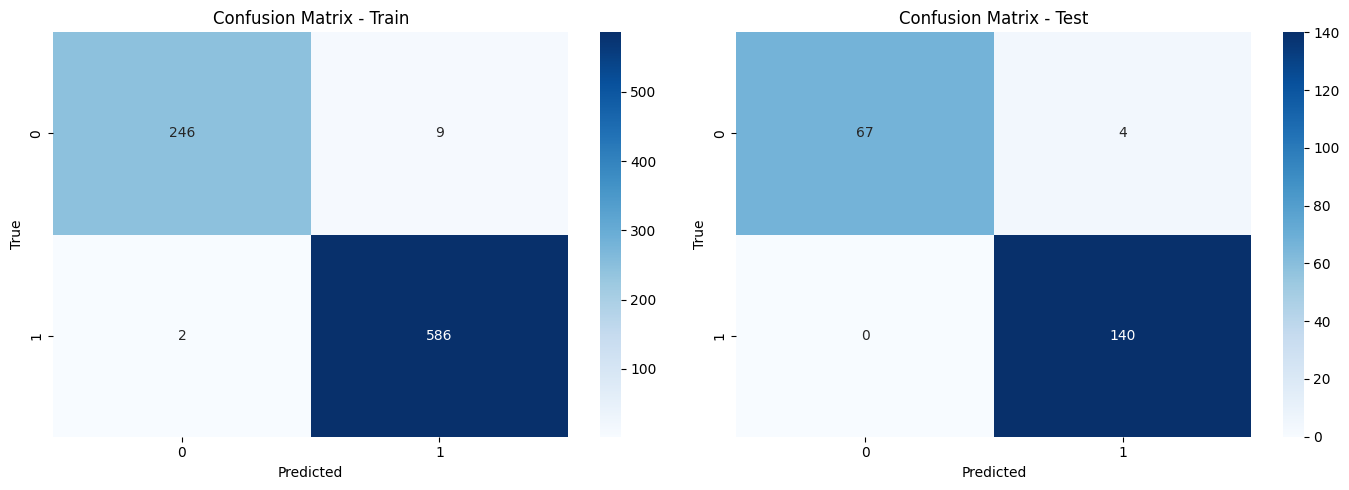

In [ ]:

def objective_function(features, X, y):
    features = np.array(features).astype(bool)
    if not np.any(features):  # Ensure at least one feature is selected
        return float('inf')  # Return a high value for invalid solutions
    X_selected = X[:, features]

    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return -accuracy_score(y_test, y_pred)

# Firefly Algorithm
class FireflyAlgorithm:
    def __init__(self, objective_function, lb, ub, args=(), pop_size=20, max_iter=50, alpha=0.5, beta_min=0.2, gamma=1.0):
        self.objective_function = objective_function
        self.lb = np.array(lb)
        self.ub = np.array(ub)
        self.args = args
        self.pop_size = pop_size
        self.max_iter = max_iter
        self.alpha = alpha
        self.beta_min = beta_min
        self.gamma = gamma

    def run(self):
        dim = len(self.lb)
        population = np.random.randint(2, size=(self.pop_size, dim))
        fitness = np.apply_along_axis(self.objective_function, 1, population, *self.args)

        best_firefly = population[np.argmin(fitness)]
        best_fitness = np.min(fitness)

        for t in range(self.max_iter):
            for i in range(self.pop_size):
                for j in range(self.pop_size):
                    if fitness[i] > fitness[j]:
                        r = np.linalg.norm(population[i] - population[j])
                        beta = self.beta_min + (1 - self.beta_min) * np.exp(-self.gamma * r ** 2)
                        population[i] = population[i] + beta * (population[j] - population[i]) + \
                                        self.alpha * (np.random.rand(dim) - 0.5)
                        population[i] = np.clip(population[i], self.lb, self.ub)
                        population[i] = np.round(population[i])
                        if not np.any(population[i]):  # Ensure at least one feature is selected
                            population[i][np.random.randint(dim)] = 1
                        fitness[i] = self.objective_function(population[i], *self.args)

            best_firefly = population[np.argmin(fitness)]
            best_fitness = np.min(fitness)

        return best_firefly, best_fitness
# Define the objective function and apply FA
num_features = X_reduced.shape[1]
lb = [0] * num_features
ub = [1] * num_features
fa = FireflyAlgorithm(objective_function, lb, ub, args=(X_reduced, y), pop_size=10, max_iter=25)
best_features, _ = fa.run()
# Select best features
X_selected = X_reduced[:, best_features.astype(bool)]
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=52)
clf = GaussianNB()
clf.fit(X_train, y_train)
# Predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report (Train):")
print(classification_report(y_train, y_pred_train))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

In [ ]:
# Define the objective function and apply FA
num_features = X_reduced.shape[1]
lb = [0] * num_features
ub = [1] * num_features
fa = FireflyAlgorithm(objective_function, lb, ub, args=(X_reduced, y), pop_size=10, max_iter=25)
best_features, _ = fa.run()

In [ ]:
# Select best features
X_selected = X_reduced[:, best_features.astype(bool)]
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=52)

**Train the model**

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9822064056939501
Test Accuracy: 0.985781990521327


**Classification Report**


Classification Report (Train):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       255
           1       0.98      0.99      0.99       588

    accuracy                           0.98       843
   macro avg       0.98      0.98      0.98       843
weighted avg       0.98      0.98      0.98       843


Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        71
           1       0.98      1.00      0.99       140

    accuracy                           0.99       211
   macro avg       0.99      0.98      0.98       211
weighted avg       0.99      0.99      0.99       211



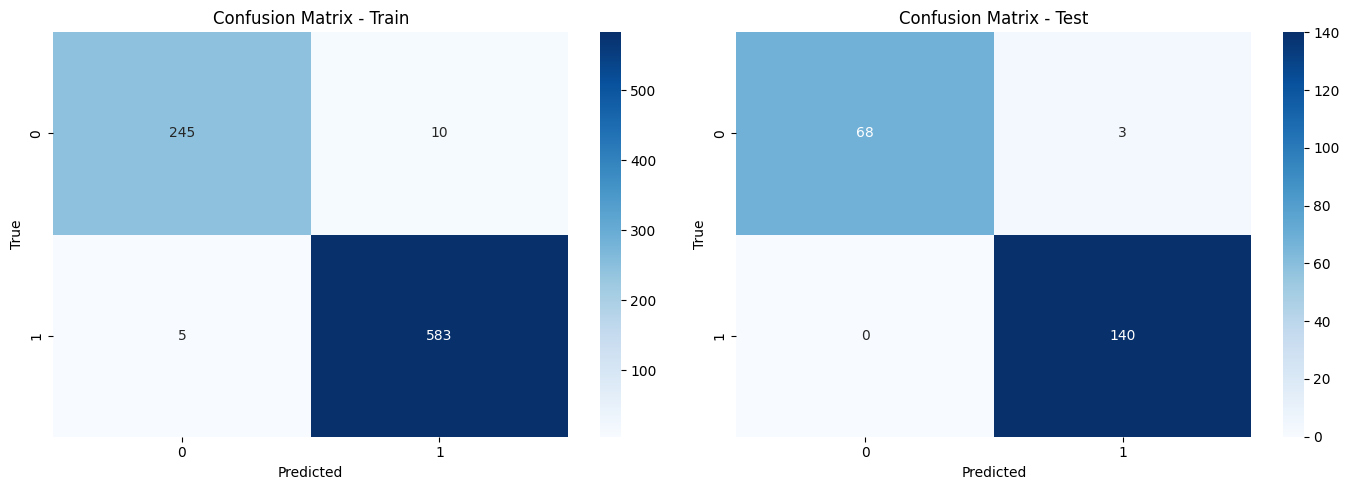

In [ ]:
print("\nClassification Report (Train):")
print(classification_report(y_train, y_pred_train))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()